Load libraries

In [0]:
################################################################
#Decision Tree Example
#Author: Edwyn Javier Aldana
################################################################

from sklearn.tree import DecisionTreeClassifier #for decision tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Load dataset

In [0]:
######################################################
#Uncomment the block online or local depending your
#execution environment
######################################################
#Online
from google.colab import files
uploaded = files.upload()
import io
dataset = pd.read_csv(io.BytesIO(uploaded['Cars.csv']))

#Local
#dataset = pd.read_csv('../../data/Cars.csv')

#Describe shape of the dataset
print(dataset.shape)
#View some statistics
dataset.head()

#Atribute Information
#Class Values:
#unacc, acc, good, vgood
#Attributes:
#buying: vhigh, high, med, low.
#maint: vhigh, high, med, low.
#doors: 2, 3, 4, 5more.
#persons: 2, 4, more.
#luggage_boot: small, med, big.
#safety: low, med, high.



Saving Cars.csv to Cars.csv
(1728, 7)


buying  maint  doors  persons  lug_boot  safety values
0       4      4      2        2         1       1  unacc
1       4      4      2        2         1       2  unacc
2       4      4      2        2         1       3  unacc
3       4      4      2        2         2       1  unacc
4       4      4      2        2         2       2  unacc

In [0]:
#Define the predictor and the output variable.
X = dataset.loc[:,'buying':'safety'] 
y = dataset.loc[:,'values'] 
X.head()

buying  maint  doors  persons  lug_boot  safety
0       4      4      2        2         1       1
1       4      4      2        2         1       2
2       4      4      2        2         1       3
3       4      4      2        2         2       1
4       4      4      2        2         2       2

Encode the targets categories in terms of binary digits

In [0]:
y = pd.get_dummies(y)
y

acc  good  unacc  vgood
0       0     0      1      0
1       0     0      1      0
2       0     0      1      0
3       0     0      1      0
4       0     0      1      0
...   ...   ...    ...    ...
1723    0     1      0      0
1724    0     0      0      1
1725    0     0      1      0
1726    0     1      0      0
1727    0     0      0      1

[1728 rows x 4 columns]

Define training and test datasets

In [0]:
#Define the sizes of training set and test dataset, applying 80-20 criterion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Training process

In [0]:
#Create an instance of a Decision Tree
dt = DecisionTreeClassifier()
#Training process
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
View Decision Tree

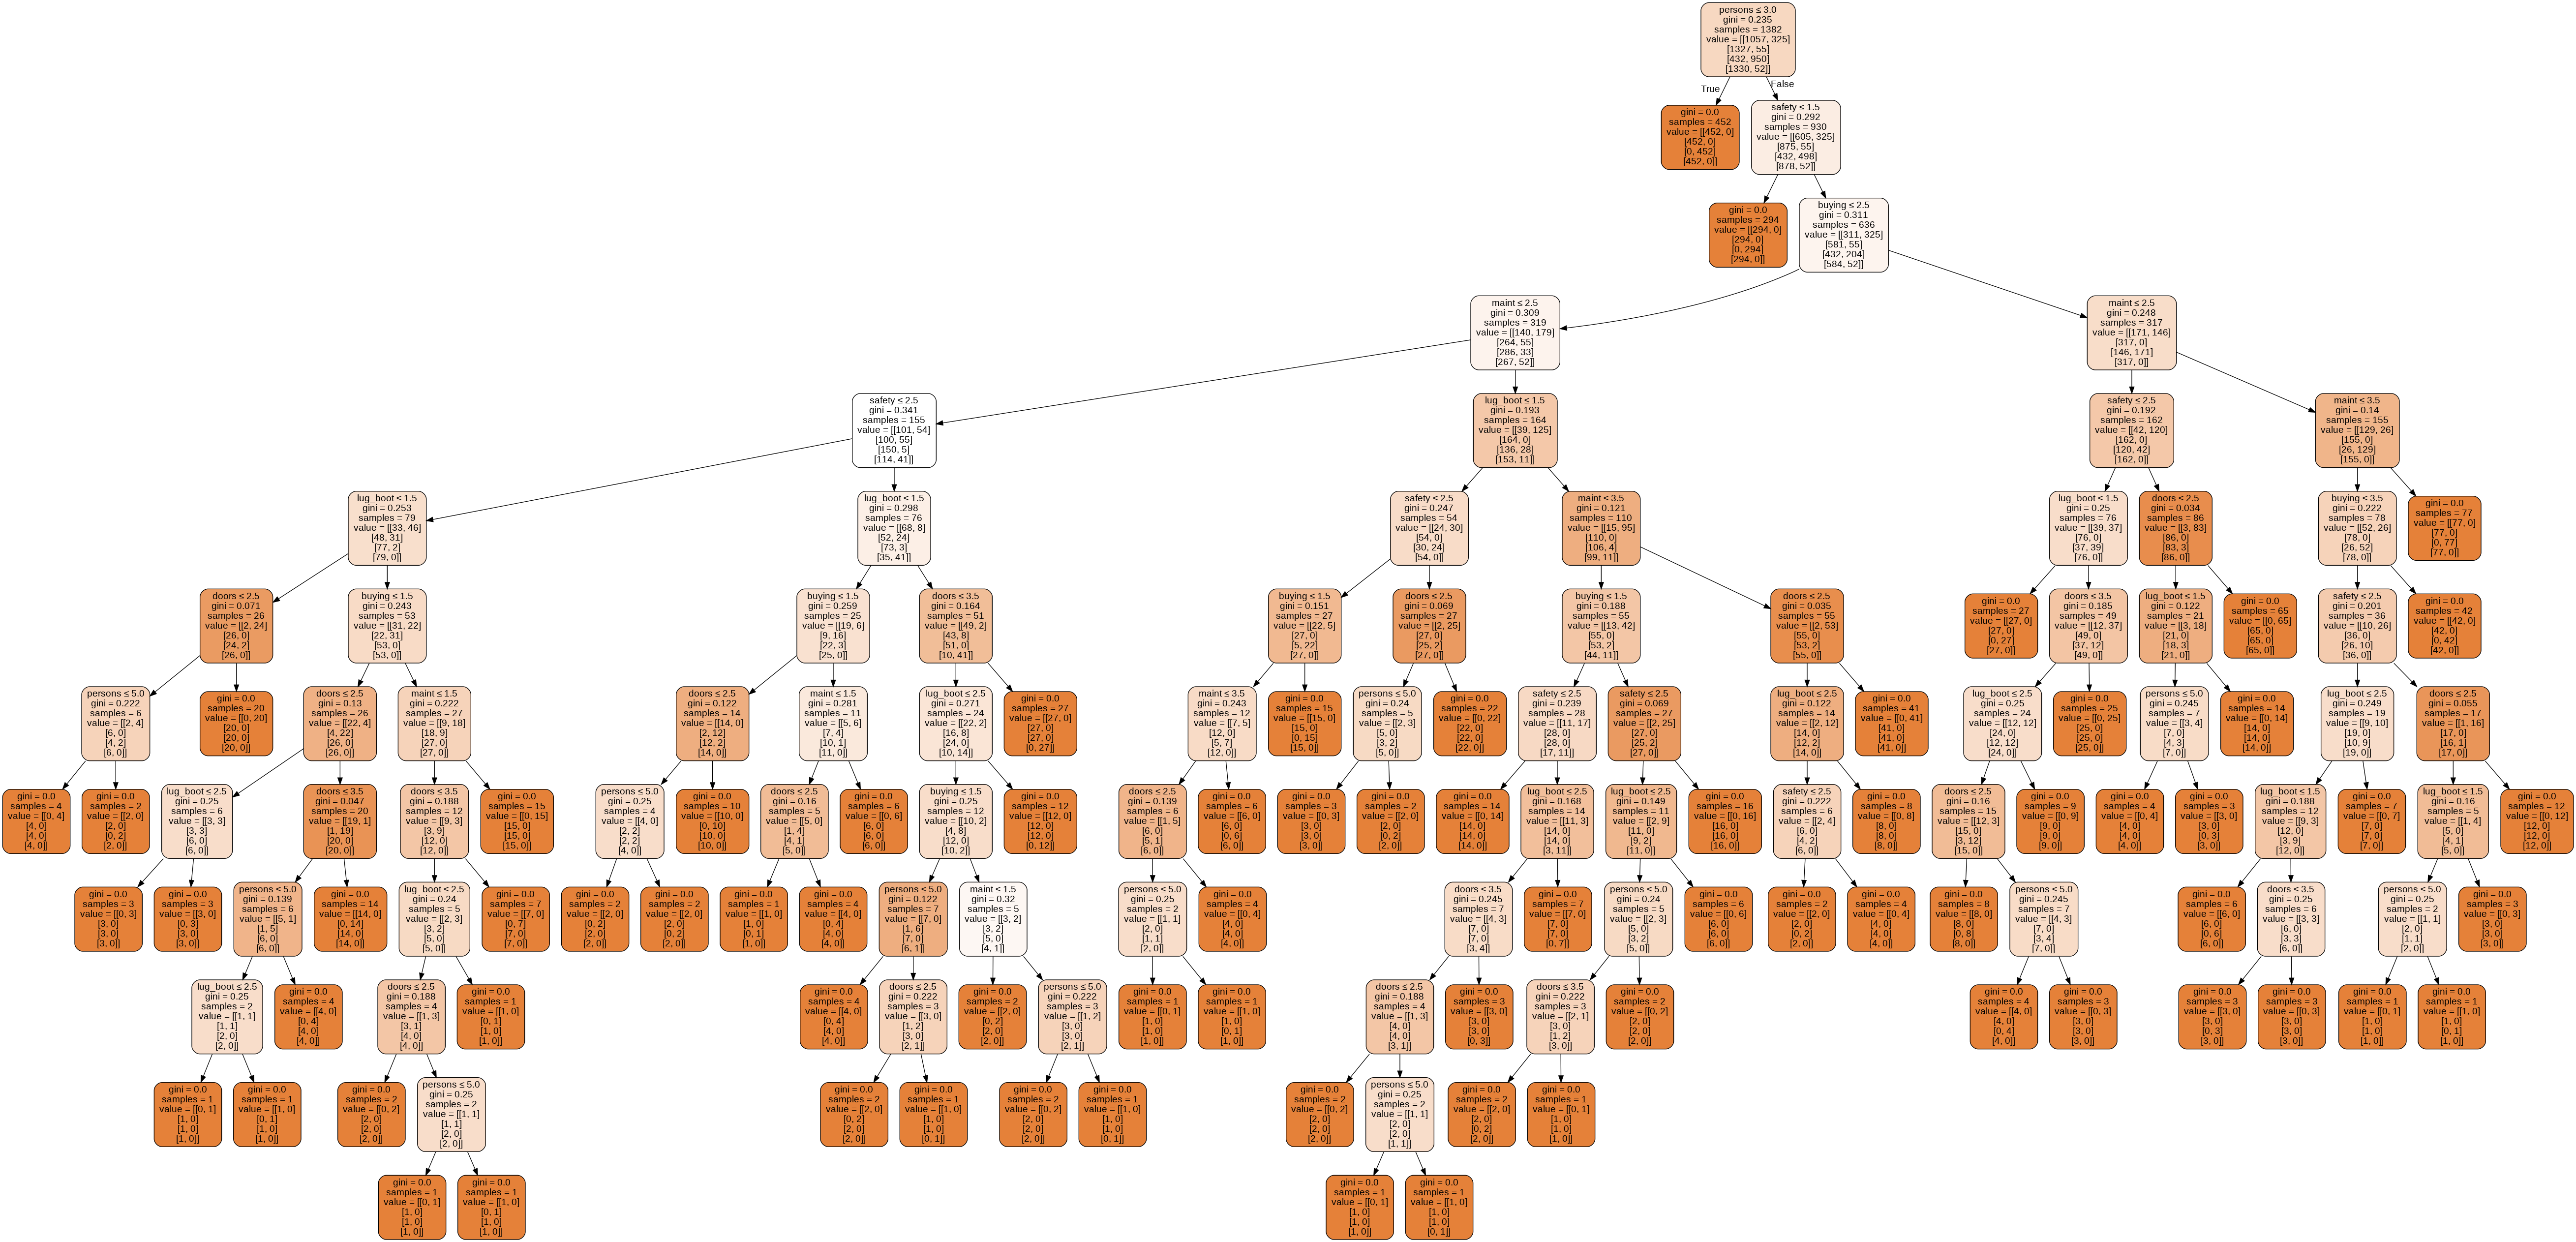

In [0]:
############################################################################
#Optional: Visualization process
############################################################################

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, 
                feature_names=X.columns.values, 
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Evaluation**

In [0]:
from sklearn.metrics import confusion_matrix
y_pred= dt.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.976878612716763


**Prediction**

In [0]:
#Values to be predicted
#buying=v-high, main=high, doors=2, persons=2, lug_boot=med, safety=3
#acc	good	unacc	vgood
prediction = dt.predict([[1,3,2,4,2,3]])
print(prediction)

[[1 0 0 0]]
